# Train_data

In [4]:
#loading Libraries
import pandas as pd
import dask.dataframe as dd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import warnings
sns.set()
warnings.filterwarnings("ignore")

In [5]:
#loading train_data in training_data df
training_data = pd.read_csv('train_v2.csv')
training_data.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [ ]:
#training_data contains two columns msno and is_churn.
#msno is a long user id and is_churn is target variable

In [6]:
training_data.describe()

,is_churn
count,970960.000000
mean,0.089942
std,0.286099
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
#training_data contains 9,70,960 values.
#Only 0 and 1 value is possible for is_churn.

In [7]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
msno        970960 non-null object
is_churn    970960 non-null int64
dtypes: int64(1), object(1)
memory usage: 14.8+ MB


In [ ]:
#There is NO null value present in the current dataframe.

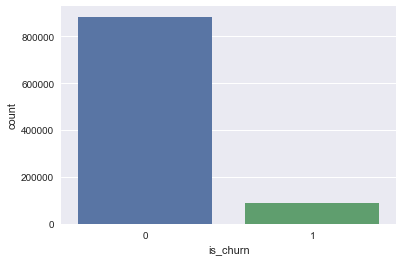

In [8]:
sns.countplot(training_data['is_churn'])
plt.show()

In [ ]:
#training data is highly imbalanced , lots of non-churned users than churned_users.

In [9]:
positive=training_data['is_churn'].value_counts()[0]
negative=training_data['is_churn'].value_counts()[1]
positive_percent=positive/992931
negative_percent=negative/992931
print("No of Positive datapoints is ",positive)
print("No of Negative datapoint is ",negative)
print("Percent of Positive points ",positive_percent*100,"%")
print("percent of Negative points ", negative_percent*100,"%")

No of Positive datapoints is  883630
No of Negative datapoint is  87330
Percent of Positive points  88.99208504921289 %
percent of Negative points  8.79517307849186 %


# Member_data

In [10]:
member_data=pd.read_csv('members_v3.csv',parse_dates=['registration_init_time'])
member_data.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,2011-09-15


In [11]:
member_data.shape

(6769473, 6)

In [ ]:
#This df has 6 columns.
#Gender has NaN values
#Registration_init_time is a data-time feature
#Gender is given in string format , label encoding should be used here.

In [12]:
#https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation
member_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,city,bd,registered_via
count,6769473.000000,6769473.000000,6769473.000000
mean,3.847358,9.795794,5.253069
std,5.478359,17.925900,2.361398
min,1.000000,-7168.000000,-1.000000
25%,1.000000,0.000000,4.000000
50%,1.000000,0.000000,4.000000
75%,4.000000,21.000000,7.000000
max,22.000000,2016.000000,19.000000


In [ ]:
#City feature has min value 1 and max 22
#bd is age , where min is -ve and max is 2016 . so must contain outliers.
#registered_via has min -ve value.

In [13]:
member_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
msno                      object
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 309.9+ MB


In [14]:
#distinct values of city
member_data['city'].value_counts()

1     4804326
5      385069
13     320978
4      246848
22     210407
15     190213
6      135200
14      89940
12      66843
9       47639
11      47489
8       45975
18      38039
10      32482
21      30837
17      27772
3       27282
7       11610
16       5092
20       4233
19       1199
Name: city, dtype: int64

In [ ]:
#City data has no outlier with city 1 being highest

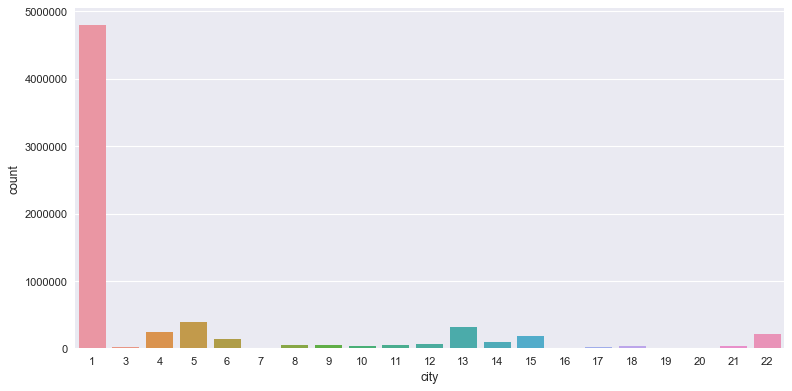

In [15]:
figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(member_data['city'])
plt.tight_layout()
plt.show()

In [ ]:
#City 1 is dominant over all other cities
#other city with more No. of user are city: 4,5,13,15,22.

In [16]:
#bd is age where min is -ve and max is 2016
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(member_data['bd'],percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Age'])

,Age
0.000,-7168.0
10.000,0.0
20.000,0.0
30.000,0.0
40.000,0.0
50.000,0.0
60.000,0.0
70.000,18.0
80.000,25.0
90.000,33.0


In [ ]:
#we have 80 precentile <=25 years , data for youngsters more.
#many outliers in this bd column , needs to be corrected.


In [17]:
member_data['gender'].value_counts()

male      1195355
female    1144613
Name: gender, dtype: int64

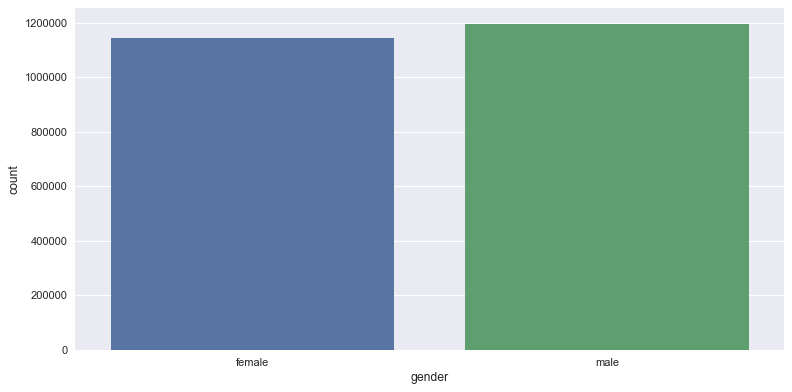

In [18]:
figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(member_data['gender'])
plt.tight_layout()
plt.show()

In [ ]:
#gender value count is nearly same

In [19]:
member_data.isnull().sum()


msno                            0
city                            0
bd                              0
gender                    4429505
registered_via                  0
registration_init_time          0
dtype: int64

In [ ]:
#only gender having null values , other column dont have null values.
#we can neglect gender column as most of the data is empty.

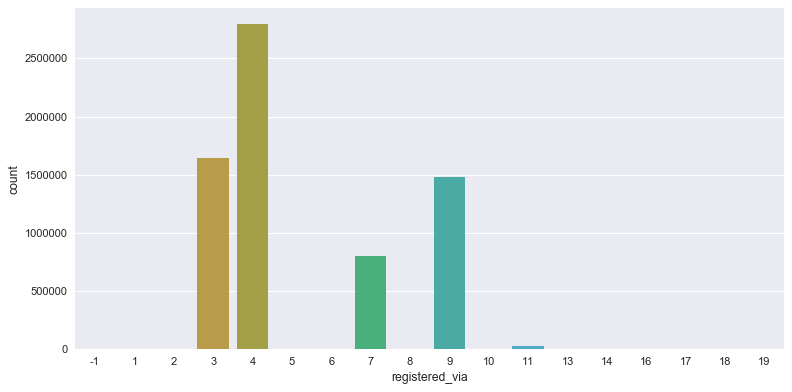

In [20]:
#count of registered via
figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(member_data['registered_via'])             
plt.tight_layout()
plt.show()

In [ ]:
#most used registered_via are 3,4,7,9. 
#we can make a binary  whether registration via comes from most used method.


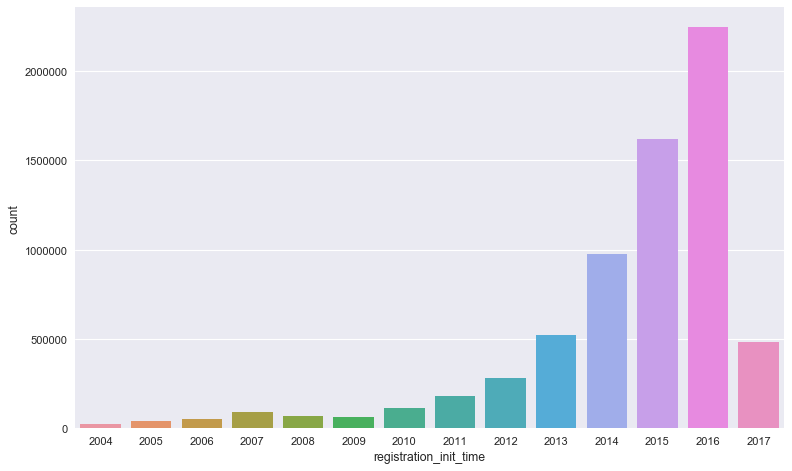

In [21]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(member_data['registration_init_time'].dt.year)
plt.tight_layout()

In [ ]:
#This graph shows business is rising exponentially.

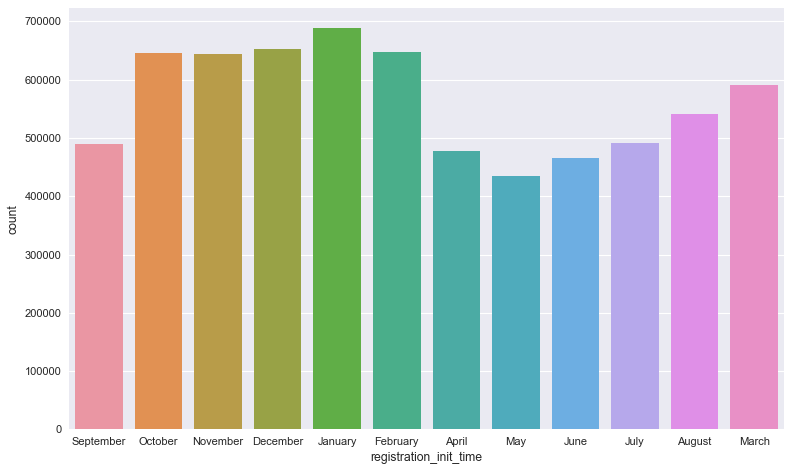

In [22]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(member_data['registration_init_time'].dt.month_name())
plt.tight_layout()

In [ ]:
#people make registration in later months i.e ending and starting of year, Company can give some discount on middle months to increase profit.

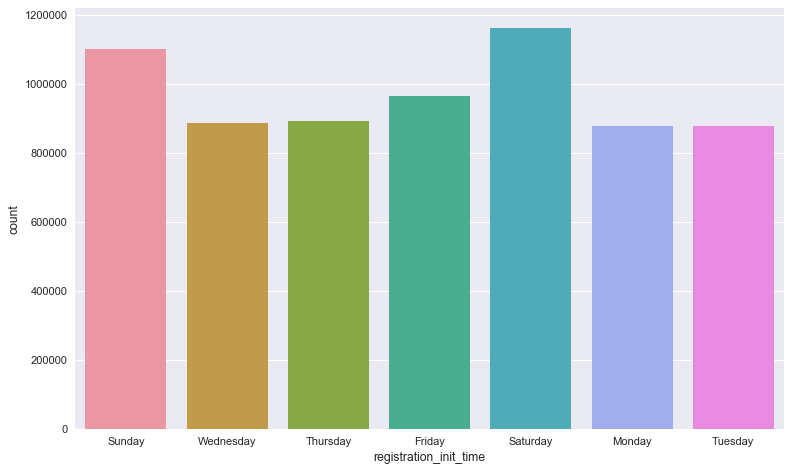

In [23]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(member_data['registration_init_time'].dt.day_name())
plt.tight_layout()

In [24]:
#many people register on weekends - Saturday and Sunday

# Transaction_data

In [25]:
transaction_data=pd.read_csv('transactions_v2.csv' , parse_dates=['transaction_date','membership_expire_date'])
transaction_data.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0


In [ ]:
#transaction_data having 9 columns

In [26]:
transaction_data.shape

(1431009, 9)

In [ ]:
#total rows are 1431009.

In [27]:
transaction_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel
count,1431009.000000,1431009.000000,1431009.000000,1431009.000000,1431009.000000,1431009.000000
mean,37.918355,66.017696,281.787035,281.317241,0.785303,0.024551
std,4.964805,102.486396,435.186138,435.419950,0.410612,0.154753
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,30.000000,99.000000,99.000000,1.000000,0.000000
50%,40.000000,30.000000,149.000000,149.000000,1.000000,0.000000
75%,41.000000,30.000000,149.000000,149.000000,1.000000,0.000000
max,41.000000,450.000000,2000.000000,2000.000000,1.000000,1.000000


In [ ]:
#no null values in transaction_data

In [28]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431009 entries, 0 to 1431008
Data columns (total 9 columns):
msno                      1431009 non-null object
payment_method_id         1431009 non-null int64
payment_plan_days         1431009 non-null int64
plan_list_price           1431009 non-null int64
actual_amount_paid        1431009 non-null int64
is_auto_renew             1431009 non-null int64
transaction_date          1431009 non-null datetime64[ns]
membership_expire_date    1431009 non-null datetime64[ns]
is_cancel                 1431009 non-null int64
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 98.3+ MB


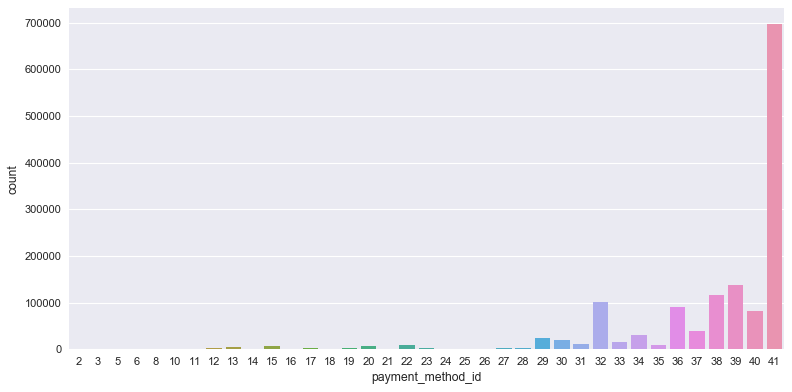

In [29]:
#payment_method id
figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(transaction_data['payment_method_id'])
plt.tight_layout()
plt.show()

In [ ]:
#more popular payment are 32,34,36,37,38,39,40,41
#can create binary flag whether they are from popular_payment

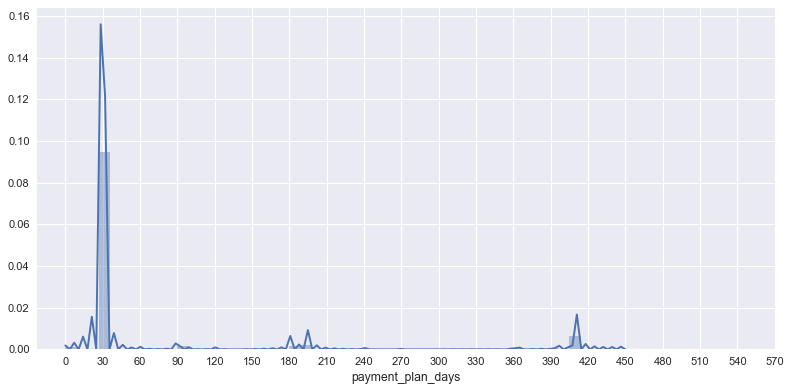

In [30]:
#payment_plan_days
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(transaction_data['payment_plan_days'])
plt.xticks(range(0,600,30)) #why 30 ? taking 1 month 
plt.tight_layout()
plt.show()

In [31]:
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(transaction_data['payment_plan_days'],percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Percentille'])

,Percentille
0.000,0.0
10.000,30.0
20.000,30.0
30.000,30.0
40.000,30.0
50.000,30.0
60.000,30.0
70.000,30.0
80.000,30.0
90.000,195.0


In [ ]:
#everyone takes mostly 30 days plan.


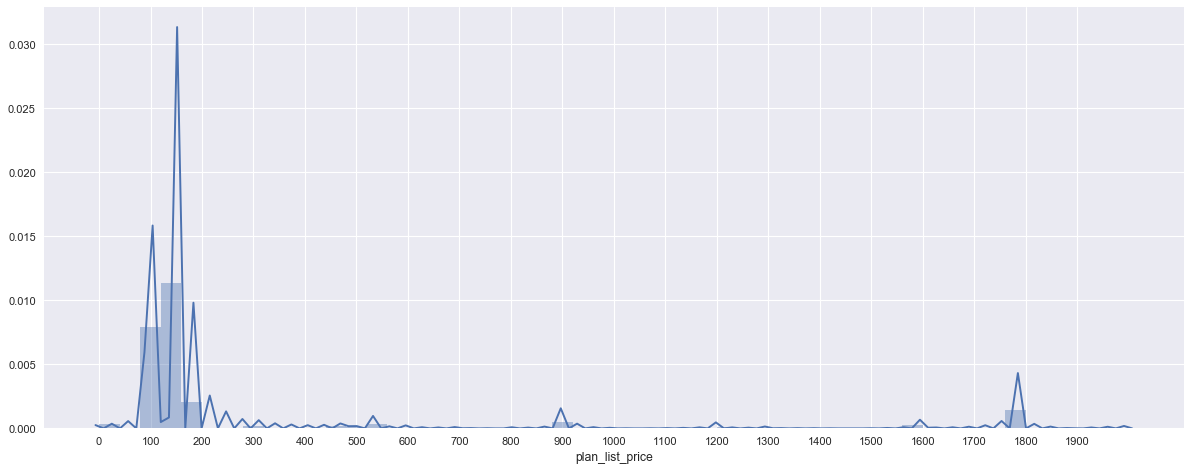

In [32]:
#plan list price
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(transaction_data['plan_list_price'])
plt.xticks(range(0,2000,100))
plt.tight_layout()
plt.show()

In [ ]:
#some user choose very high plan price , an indiactor needs to be used.

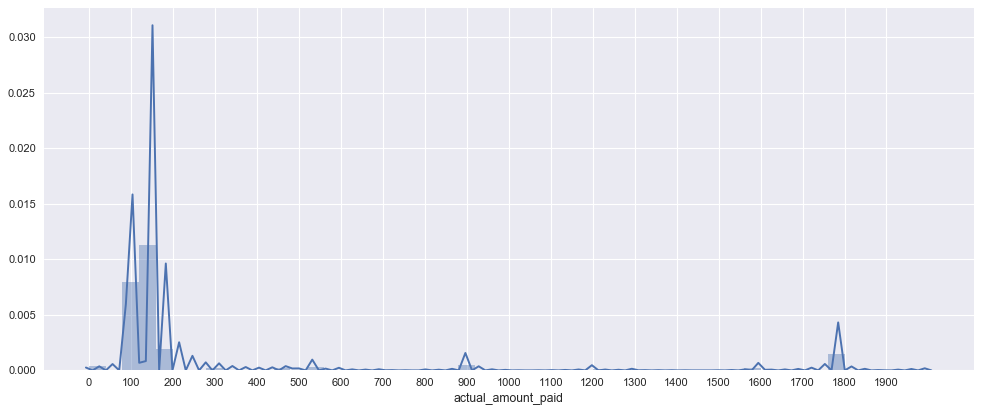

In [33]:
#actual_amount_paid
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(transaction_data['actual_amount_paid'])
plt.xticks(range(0,2000,100))
plt.show()

In [ ]:
#looks nearly same as plan_list price.

In [34]:
(transaction_data['actual_amount_paid']!=transaction_data['plan_list_price']).value_counts()

False    1419106
True       11903
dtype: int64

In [ ]:
#There is some difference b/w actual_amount_paid and plan_list_price.

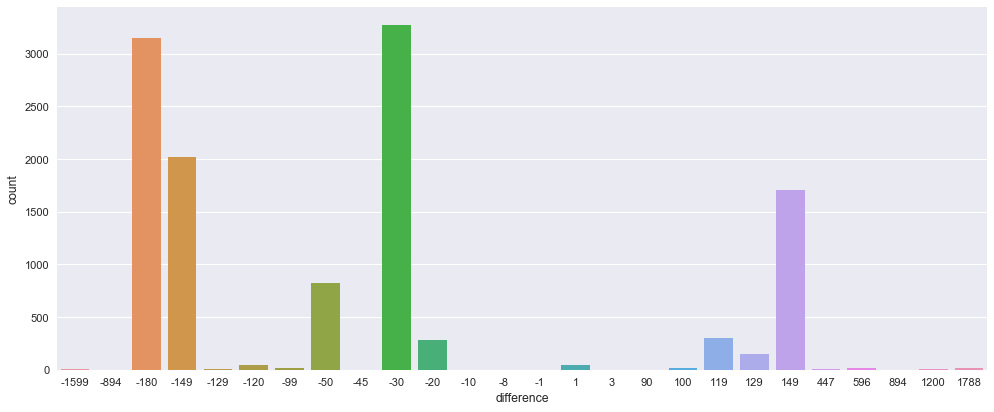

In [35]:
#where there is diff
temp_data = transaction_data[transaction_data['actual_amount_paid']!=transaction_data['plan_list_price']]
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('difference')
sns.countplot(temp_data['actual_amount_paid']-temp_data['plan_list_price'])
plt.show()

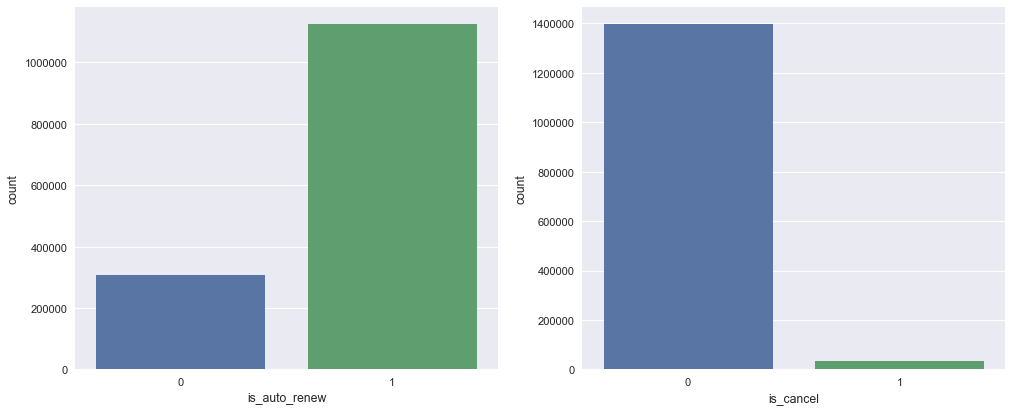

In [36]:
#is_cancel and is_auto_renew
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(121)
sns.countplot(transaction_data['is_auto_renew'])
plt.subplot(122)
sns.countplot(transaction_data['is_cancel'])
plt.show()

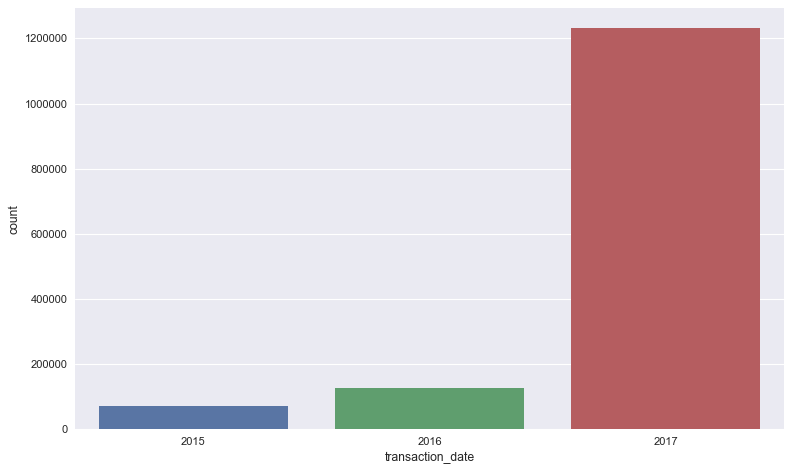

In [37]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(transaction_data['transaction_date'].dt.year)
plt.tight_layout()

In [ ]:
#Mostly we are given data of 2017 in this dataset.

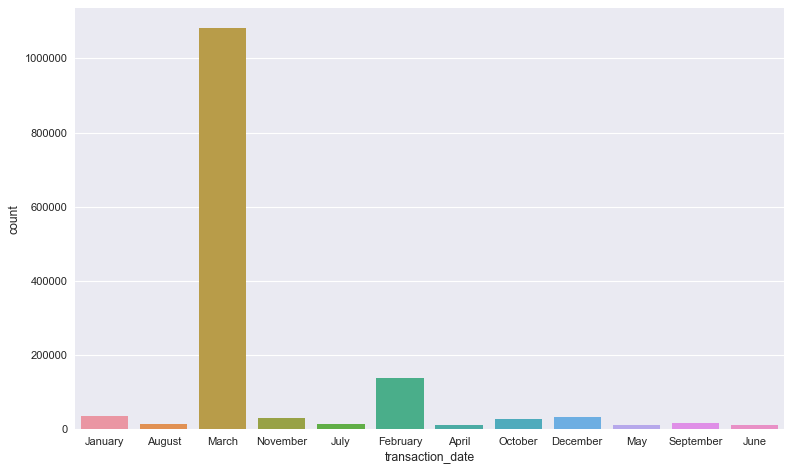

In [38]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(transaction_data['transaction_date'].dt.month_name())
plt.tight_layout()

In [ ]:
#Dataset belongs to March

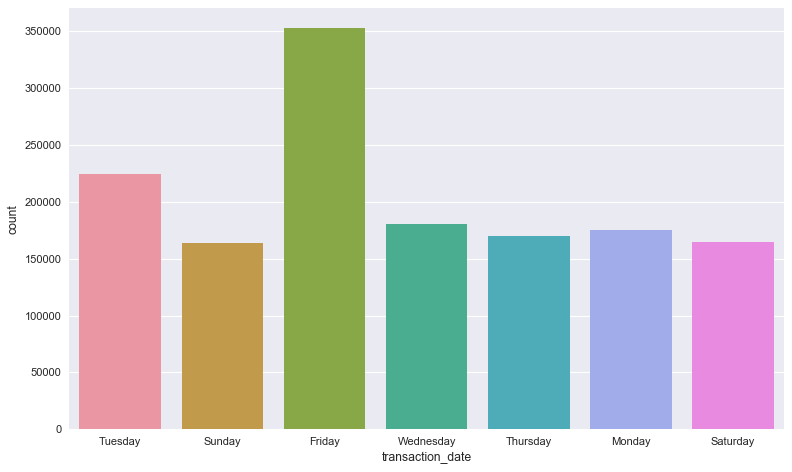

In [39]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(transaction_data['transaction_date'].dt.day_name())
plt.tight_layout()

In [ ]:
#Friday has the most number of transactions.

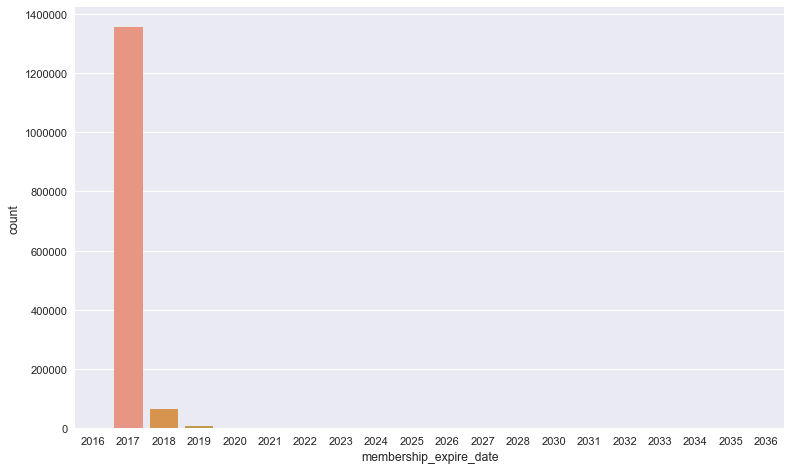

In [40]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(transaction_data['membership_expire_date'].dt.year)
plt.tight_layout()

In [ ]:
#people are very consistent , hence all expiration date in 2017

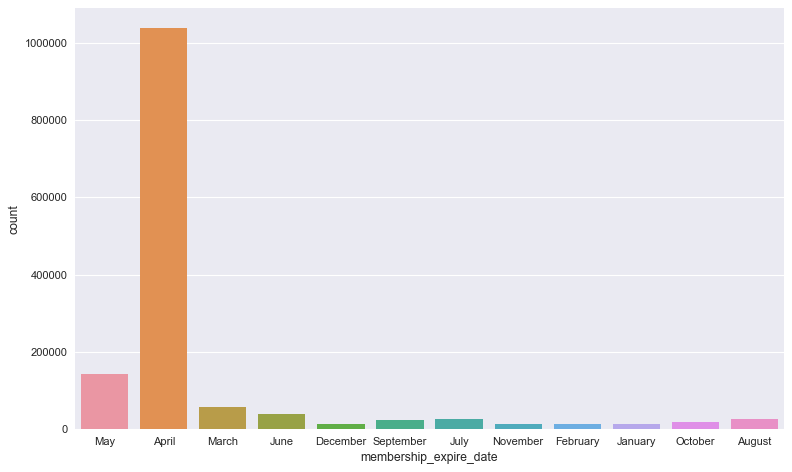

In [41]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(transaction_data['membership_expire_date'].dt.month_name())
plt.tight_layout()

In [ ]:
#Most of the people subcription ends in April because this data is of March.

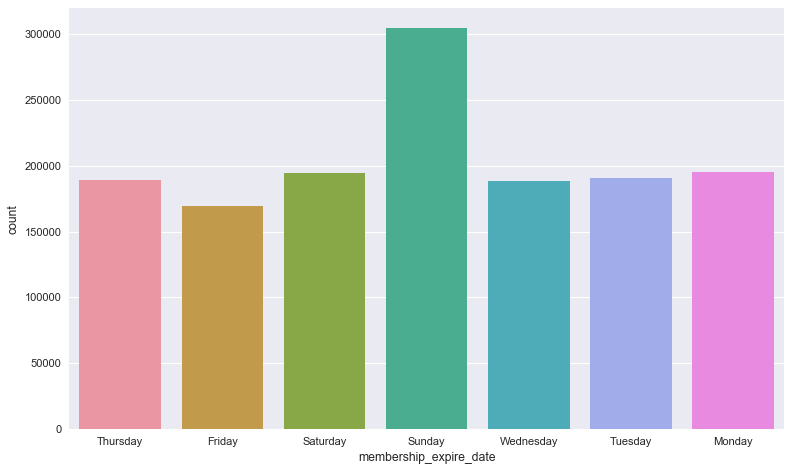

In [42]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(transaction_data['membership_expire_date'].dt.day_name())
plt.tight_layout()

In [ ]:
#sunday is the most likely day for end of subscription

# User_logs

In [43]:
user_logs = pd.read_csv('user_logs_v2.csv')


In [44]:
user_logs.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [ ]:
#Total 9 columns -  all numerical features
#As it is user logs (divided on basis of days) more than 1 entry of single user is very common and obvious.

In [45]:
user_logs.shape

(18396362, 9)

In [46]:
user_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396362 entries, 0 to 18396361
Data columns (total 9 columns):
msno          object
date          int64
num_25        int64
num_50        int64
num_75        int64
num_985       int64
num_100       int64
num_unq       int64
total_secs    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 1.2+ GB


In [47]:
user_logs.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,18396362.000000,18396362.000000,18396362.000000,18396362.000000,18396362.000000,18396362.000000,18396362.000000,18396362.000000
mean,20170316.085613,6.191401,1.508789,0.941376,1.079905,30.282461,29.036146,7904.813556
std,8.916720,13.428266,3.908539,1.924840,3.518409,42.036412,32.198660,10136.323015
min,20170301.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.001000
25%,20170308.000000,0.000000,0.000000,0.000000,0.000000,7.000000,8.000000,1959.944000
50%,20170316.000000,2.000000,1.000000,0.000000,0.000000,17.000000,18.000000,4582.990000
75%,20170324.000000,7.000000,2.000000,1.000000,1.000000,37.000000,38.000000,9848.441000
max,20170331.000000,5639.000000,912.000000,508.000000,1561.000000,41107.000000,4925.000000,9194058.522000


In [48]:
user_logs.isnull().sum()

msno          0
date          0
num_25        0
num_50        0
num_75        0
num_985       0
num_100       0
num_unq       0
total_secs    0
dtype: int64

In [ ]:
#No null values

In [49]:
# printing percentiles because above we have seen that maximum values of there features are unusually high
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(user_logs['num_25'],percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Percentille'])

,Percentille
0.000,0.0
10.000,0.0
20.000,0.0
30.000,1.0
40.000,1.0
50.000,2.0
60.000,4.0
70.000,5.0
80.000,9.0
90.000,16.0


In [ ]:
#num_25 has outliers

In [50]:
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(user_logs['num_50'],percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Percentille'])

,Percentille
0.000,0.00000
10.000,0.00000
20.000,0.00000
30.000,0.00000
40.000,0.00000
50.000,1.00000
60.000,1.00000
70.000,1.00000
80.000,2.00000
90.000,4.00000


In [51]:
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(user_logs['num_75'],percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Percentille'])

,Percentille
0.000,0.0
10.000,0.0
20.000,0.0
30.000,0.0
40.000,0.0
50.000,0.0
60.000,1.0
70.000,1.0
80.000,2.0
90.000,3.0


In [52]:
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(user_logs['num_985'],percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Percentille'])

,Percentille
0.000,0.0
10.000,0.0
20.000,0.0
30.000,0.0
40.000,0.0
50.000,0.0
60.000,1.0
70.000,1.0
80.000,2.0
90.000,3.0


In [53]:
percentiles_values=[0,10,20,30,40,50,60,70,80,90,95,98,99,99.5,99.99,99.999,100]
percentile=np.percentile(user_logs['num_100'],percentiles_values)
pd.DataFrame(data=percentile,index=percentiles_values,columns=['Percentille'])

,Percentille
0.000,0.00000
10.000,2.00000
20.000,5.00000
30.000,8.00000
40.000,12.00000
50.000,17.00000
60.000,23.00000
70.000,31.00000
80.000,45.00000
90.000,75.00000


In [ ]:
#Clearly there are outliers , have to set some threshold.

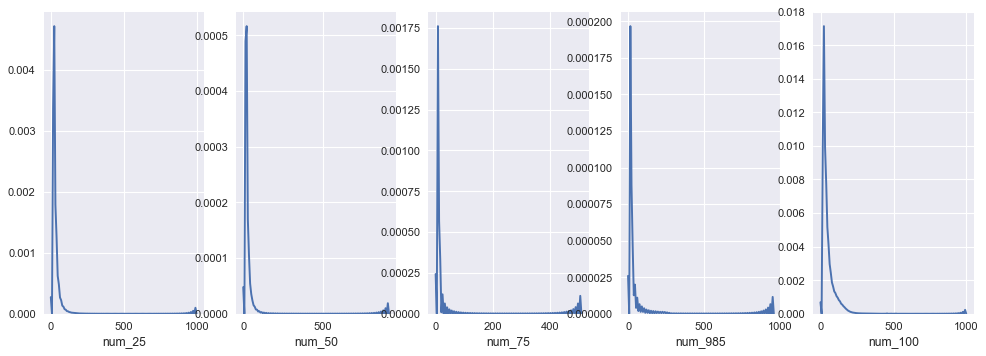

In [54]:
#Plots
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(151)
sns.distplot(user_logs['num_25'] [user_logs['num_25']<1000],hist=False)
plt.subplot(152)
sns.distplot(user_logs['num_50'] [user_logs['num_50']<1000],hist=False)
plt.subplot(153)
sns.distplot(user_logs['num_75'] [user_logs['num_75']<1000],hist=False)
plt.subplot(154)
sns.distplot(user_logs['num_985'] [user_logs['num_985']<1000],hist=False)
plt.subplot(155)
sns.distplot(user_logs['num_100'] [user_logs['num_100']<1000],hist=False)

In [ ]:
#rise and fall , and again rise . Most of the people listen some song.
#almost same in every graph

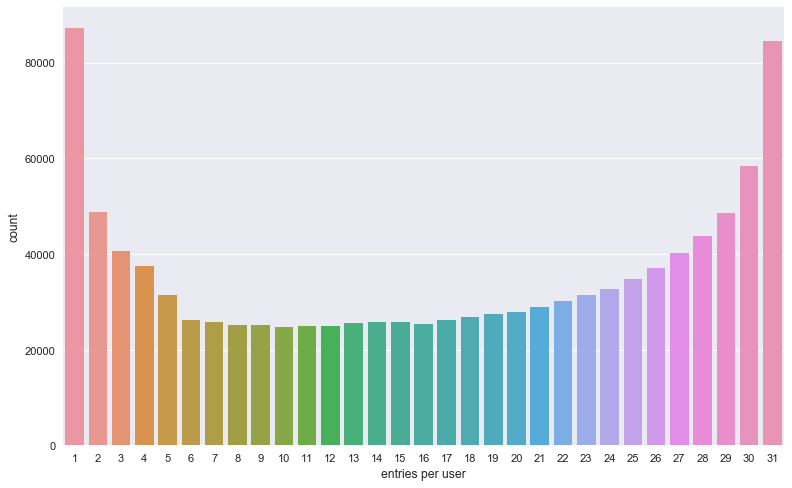

In [55]:
#No, of enteries per user
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(user_logs['msno'].value_counts().values)
plt.tight_layout()
plt.xlabel("entries per user")
plt.ylabel('count')
plt.show()

In [ ]:
#Not much info about the users , as i am using v2 file .

In [56]:
#Ploting some features with target variable
train_member = pd.merge(training_data,member_data,how='left',on='msno')

In [57]:
train_member.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,2013-12-23
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,2013-12-23
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,female,7.0,2014-01-25


[]

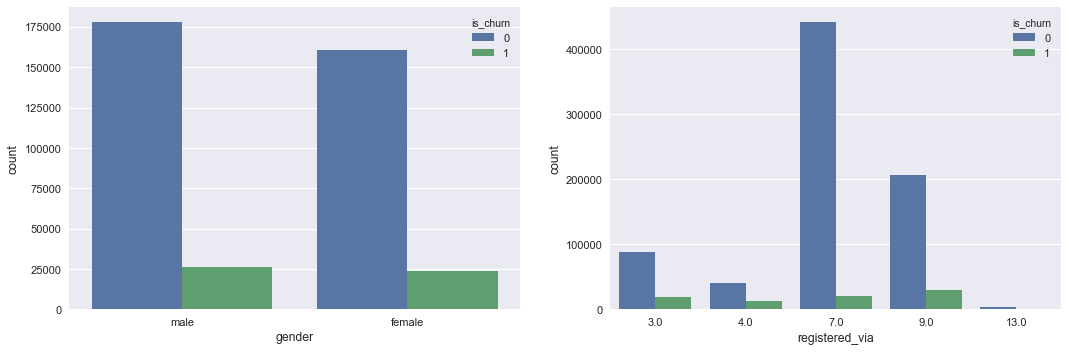

In [58]:
figure(num=None, figsize=(16, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(121)
sns.countplot(data=train_member,x='gender',hue='is_churn')
plt.subplot(122)
sns.countplot(data=train_member,x='registered_via',hue='is_churn')
plt.plot()

In [ ]:
#Gender has a very little impact on churning
#people who use method 9 has more churn

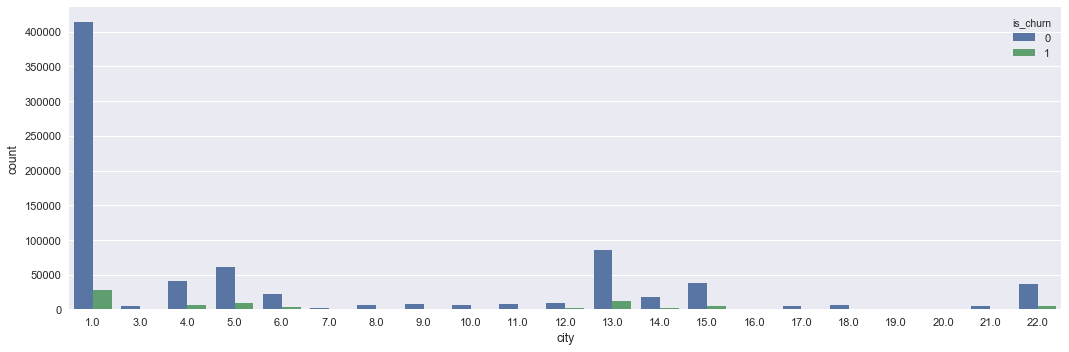

In [59]:
figure(num=None, figsize=(16, 5), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(data=train_member,x='city',hue='is_churn')

In [ ]:
#people who belong to city 4,5,15,22 have more churn rate.
#Note that city 13 have less churn rate than 5 and 22

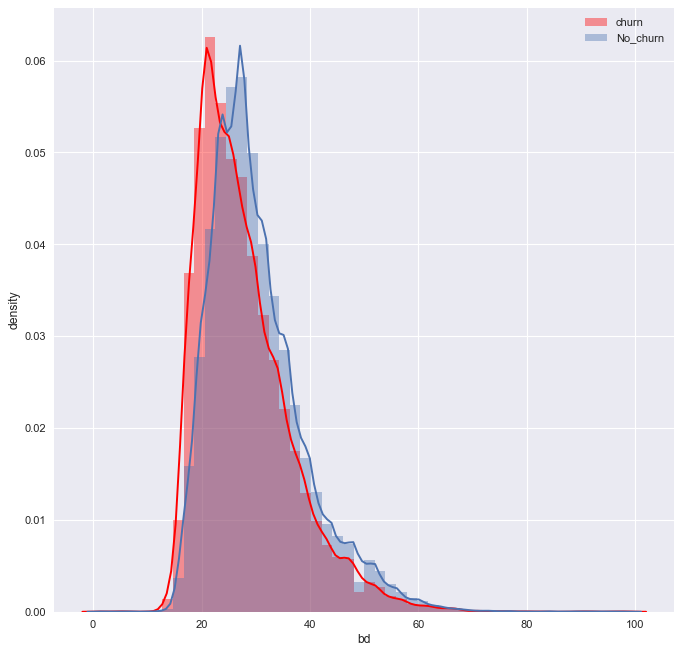

In [60]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(train_member['bd'][(train_member['is_churn']==1)&(train_member['bd']>0)&(train_member['bd']<100)],color='r',label='churn')
sns.distplot(train_member['bd'][(train_member['is_churn']==0)&(train_member['bd']>0)&(train_member['bd']<100)],label='No_churn')
plt.ylabel('density')
plt.legend()
plt.show()

In [ ]:
#Overlapping , teenagers are churnining more.

In [61]:
train_member_transaction=pd.merge(train_member,transaction_data,how='left',on='msno')

In [62]:
train_member_transaction.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,2013-12-23,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,2013-12-23,36.0,30.0,180.0,180.0,0.0,2017-03-11,2017-04-11,0.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27,17.0,60.0,0.0,0.0,0.0,2017-03-11,2017-03-14,0.0
3,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27,15.0,90.0,300.0,300.0,0.0,2017-03-14,2017-06-15,0.0
4,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09,41.0,30.0,149.0,149.0,1.0,2015-09-08,2017-06-08,0.0


In [63]:
train_member_transaction.drop(labels=['registration_init_time','transaction_date','membership_expire_date'],axis=1,inplace=True)
train_member_transaction.dropna(inplace=True)
train_member_transaction.sort_values(by='is_churn',inplace=True,ascending=False)
train_member_transaction.reset_index(drop=True,inplace=True)

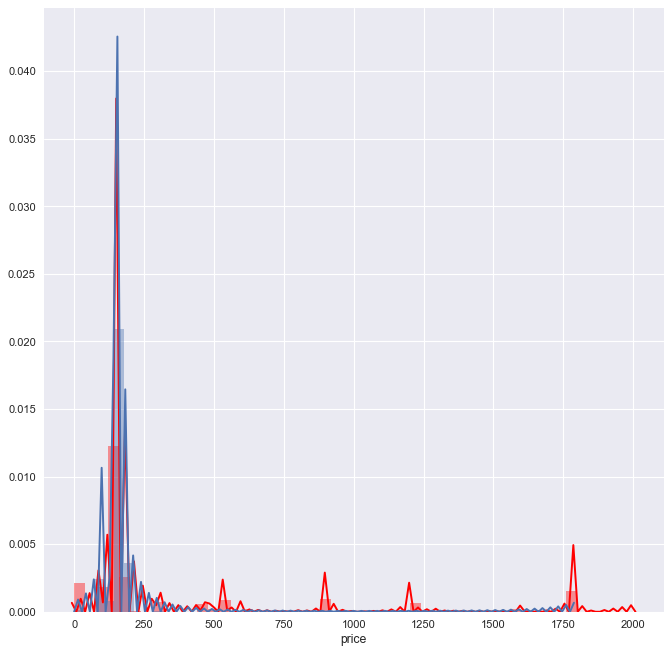

In [64]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(train_member_transaction['actual_amount_paid'][(train_member_transaction['is_churn']==1)],color='r')
sns.distplot(train_member_transaction['actual_amount_paid'][(train_member_transaction['is_churn']==0)])
plt.xlabel("price")
plt.show()

In [ ]:
#Highly overlapping , cant able to distinguish with price feature.

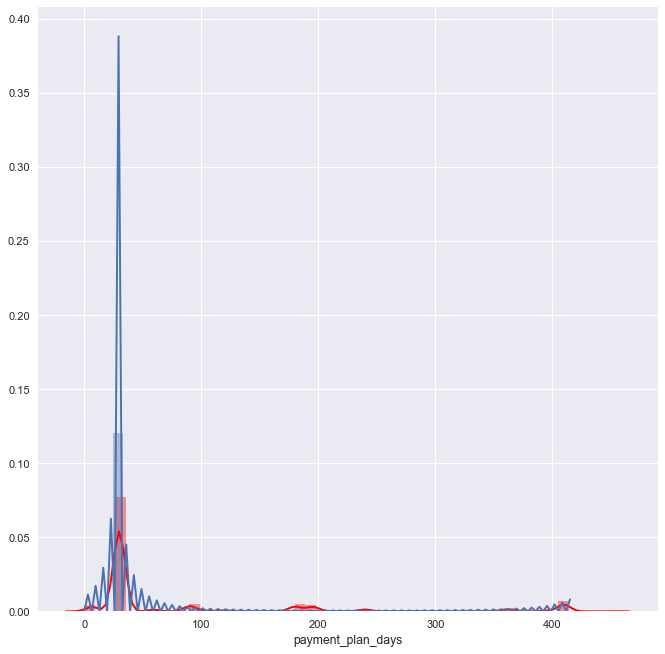

In [65]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(train_member_transaction['payment_plan_days'][(train_member_transaction['is_churn']==1)],color='r')
sns.distplot(train_member_transaction['payment_plan_days'][(train_member_transaction['is_churn']==0)])
plt.xlabel("payment_plan_days")
plt.show()

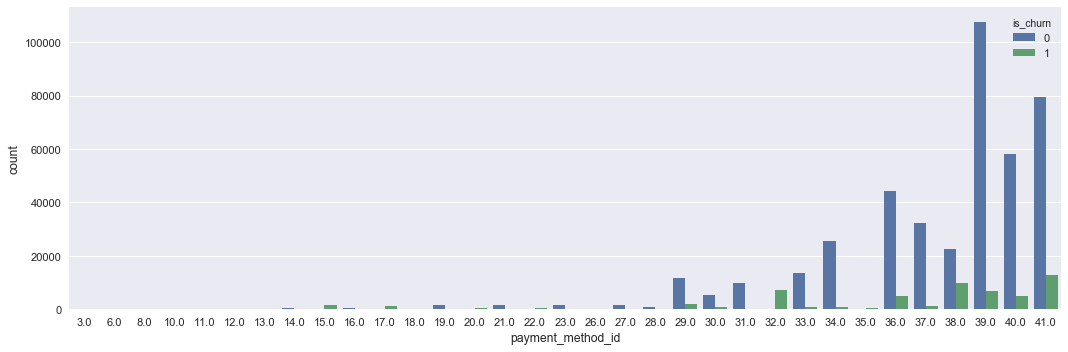

In [66]:
figure(num=None, figsize=(16, 5), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(data=train_member_transaction,x='payment_method_id',hue='is_churn')

In [ ]:
#payment id - 29,30,34,31,33,36,37,38,39,40,41 dont likely to be churn.
#payment id - 32,36,38,39,40,41  likely to be churn.


[]

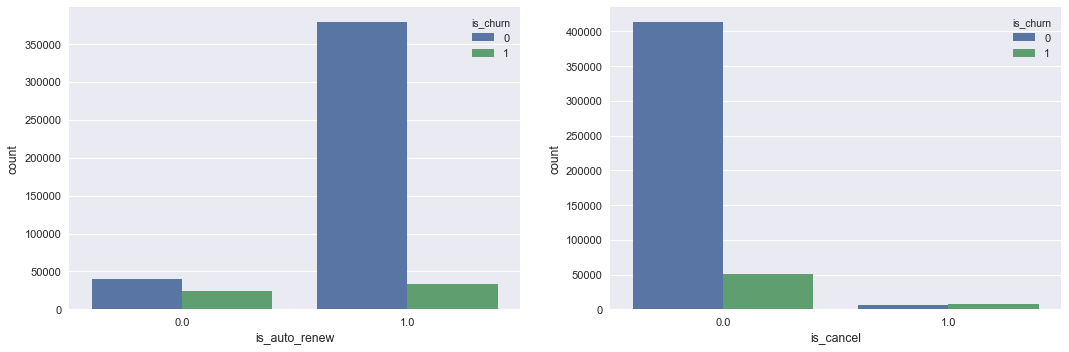

In [68]:
figure(num=None, figsize=(16, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(121)
sns.countplot(data=train_member_transaction,x='is_auto_renew',hue='is_churn')
plt.subplot(122)
sns.countplot(data=train_member_transaction,x='is_cancel',hue='is_churn')
plt.plot()

In [ ]:
#people who do auto_renew and not canceling less likey to churn.

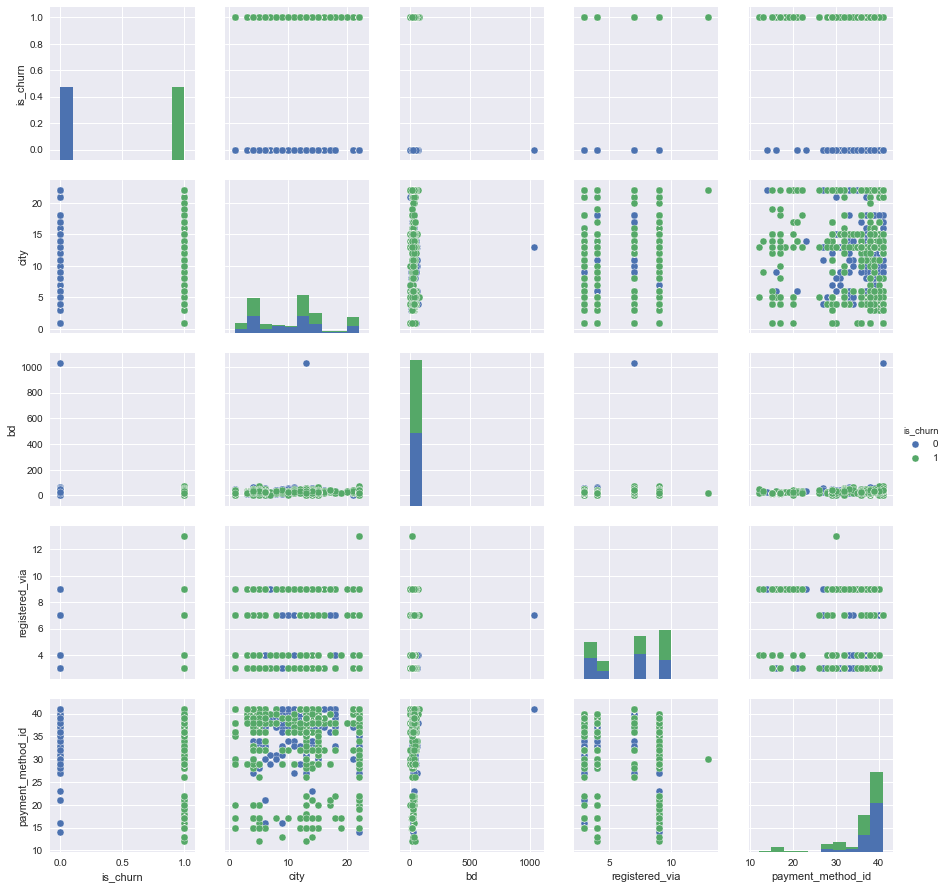

In [69]:
sns.pairplot(data=train_member_transaction[57380:59380].iloc[:,:7],hue='is_churn')

In [ ]:
#we can see that both churned and not churned customer almost overlap on each other with most of the features.